## For shopify intern challenge

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl

In [2]:
# read file
dt = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

In [3]:
# check head of file
dt.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [4]:
# adding new column to show the price per pair of shoes and check the table again with highlighted data
dt['price_per'] = dt.order_amount / dt.total_items
dt.describe()

,order_id,shop_id,user_id,order_amount,total_items,price_per
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720,387.742800
std,1443.520003,29.006118,87.798982,41282.539349,116.32032,2441.963725
min,1.000000,1.000000,607.000000,90.000000,1.00000,90.000000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000,133.000000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000,153.000000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000,169.000000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000,25725.000000


* According to the information provided by the previous table, we can see there's outlier of order_amount with price 70400 and price  per pair of shoes wtih 25725, which makes the mean of order_amount/price_per have noticeable differnece with median values.

In [5]:
# Find the outlier with average order amount and the price of shoes
dt.groupby('shop_id').agg({'order_amount':'mean', 'price_per':'mean'}).\
sort_values(ascending=[False,False], by=['order_amount', 'price_per'])

,order_amount,price_per
shop_id,,
42,235101.490196,352.0
78,49213.043478,25725.0
50,403.545455,193.0
90,403.224490,178.0
38,390.857143,190.0
...,...,...
53,214.117647,112.0
100,213.675000,111.0
32,189.976190,101.0


* This table shows that shop_id 78 has price per pair of shoes much higher than others, and 42 have way higher average order amount. These are the data should be excluded.

In [6]:
# create a new dataset without outlier
dt2 = dt[(dt.shop_id != 42) & (dt.shop_id !=78)].copy().\
sort_values(ascending=[False], by=['order_amount'])
dt2.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price_per
3538,3539,43,830,1086,6,debit,2017-03-17 19:56:29,181.0
4141,4142,54,733,1064,8,debit,2017-03-07 17:05:18,133.0
3077,3078,89,754,980,5,debit,2017-03-13 5:27:58,196.0
2494,2495,50,757,965,5,debit,2017-03-04 7:32:45,193.0
1563,1564,91,934,960,6,debit,2017-03-23 8:25:49,160.0


In [7]:
# check the new data without outliers.
dt2.describe()

,order_id,shop_id,user_id,order_amount,total_items,price_per
count,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000
mean,2499.584540,49.900877,849.858862,300.155823,1.995717,150.400163
std,1444.221163,29.154367,86.887947,155.941112,0.982602,23.851202
min,1.000000,1.000000,700.000000,90.000000,1.000000,90.000000
25%,1246.500000,24.000000,776.000000,163.000000,1.000000,132.000000
50%,2499.000000,50.000000,850.000000,284.000000,2.000000,153.000000
75%,3750.500000,74.000000,925.000000,386.500000,3.000000,166.000000
max,5000.000000,100.000000,999.000000,1086.000000,8.000000,201.000000


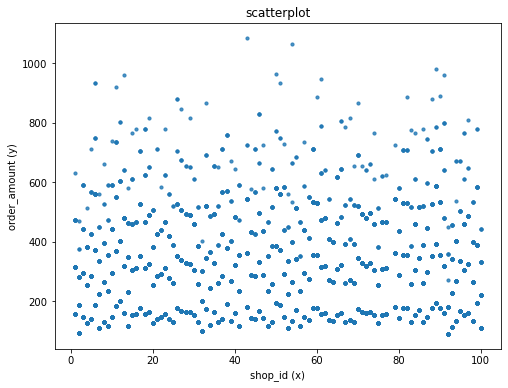

In [8]:
# visualized the new dataset
mpl.figure(figsize=(8, 6))
mpl.scatter(dt2[['shop_id']], dt2.order_amount, marker= 'o', s=10, alpha=0.8)
mpl.title('scatterplot')
mpl.xlabel('shop_id (x)')
mpl.ylabel('order_amount (y)')
mpl.show()

* Calculate new average order value(AOV) with new dataset.

In [9]:
print('AOV : ${:.2f}'.format(dt2.order_amount.sum() / len(dt2)))

AOV : $300.16
